In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [17]:
batch_size = 32
img_height, img_width = 128, 128  # Ukuran gambar (ubah sesuai kebutuhan)

# Data generator untuk training
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_data = train_datagen.flow_from_directory(
    "dataset/",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

# Data generator untuk validation
val_data = train_datagen.flow_from_directory(
    "dataset/",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)


Found 2890 images belonging to 6 classes.
Found 720 images belonging to 6 classes.


In [18]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')  # 6 output classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
epochs = 10
history = model.fit(train_data, epochs=epochs, validation_data=val_data)


Epoch 1/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 17s 176ms/step - accuracy: 0.2653 - loss: 1.7296 - val_accuracy: 0.4250 - val_loss: 1.4581
Epoch 2/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 15s 164ms/step - accuracy: 0.4362 - loss: 1.4072 - val_accuracy: 0.4944 - val_loss: 1.2623
Epoch 3/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 15s 168ms/step - accuracy: 0.5423 - loss: 1.2255 - val_accuracy: 0.5347 - val_loss: 1.2120
Epoch 4/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 15s 164ms/step - accuracy: 0.5678 - loss: 1.1350 - val_accuracy: 0.5903 - val_loss: 1.1074
Epoch 5/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 14s 158ms/step - accuracy: 0.5925 - loss: 1.0500 - val_accuracy: 0.5875 - val_loss: 1.0764
Epoch 6/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 15s 163ms/step - accuracy: 0.6141 - loss: 1.0161 - val_accuracy: 0.5597 - val_loss: 1.1086
Epoch 7/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 14s 156ms/step - accuracy: 0.6327 - loss: 0.9406 - val_accuracy: 0.5889 - val_loss: 1.0819
Epoch 8/10
91/91 ━━━━━━━━━━━━━━━━━━━━ 15s 160ms/step - accuracy: 0.6772 - loss: 0.8458 - val_accu

In [20]:
# Memuat data pengujian
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    "dataset/",
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode="categorical",
    shuffle=False
)

# Mendapatkan prediksi dari model
predictions = model.predict(test_data)
y_pred = predictions.argmax(axis=1)
y_true = test_data.classes

Found 3610 images belonging to 6 classes.
3610/3610 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step


In [21]:
# Accuracy
accuracy = accuracy_score(y_true, y_pred)

# Precision, Recall, F1 Score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7789473684210526
Precision: 0.8043667164423819
Recall: 0.7789473684210526
F1 Score: 0.7781608033901091
Confusion Matrix:
 [[631  79  52  37   1   0]
 [ 65 442  45   4   0   0]
 [ 11  30 765  11  11   9]
 [ 40  19 105 368   0  12]
 [ 19  28 149   4 265   5]
 [  1   3  51   6   1 341]]


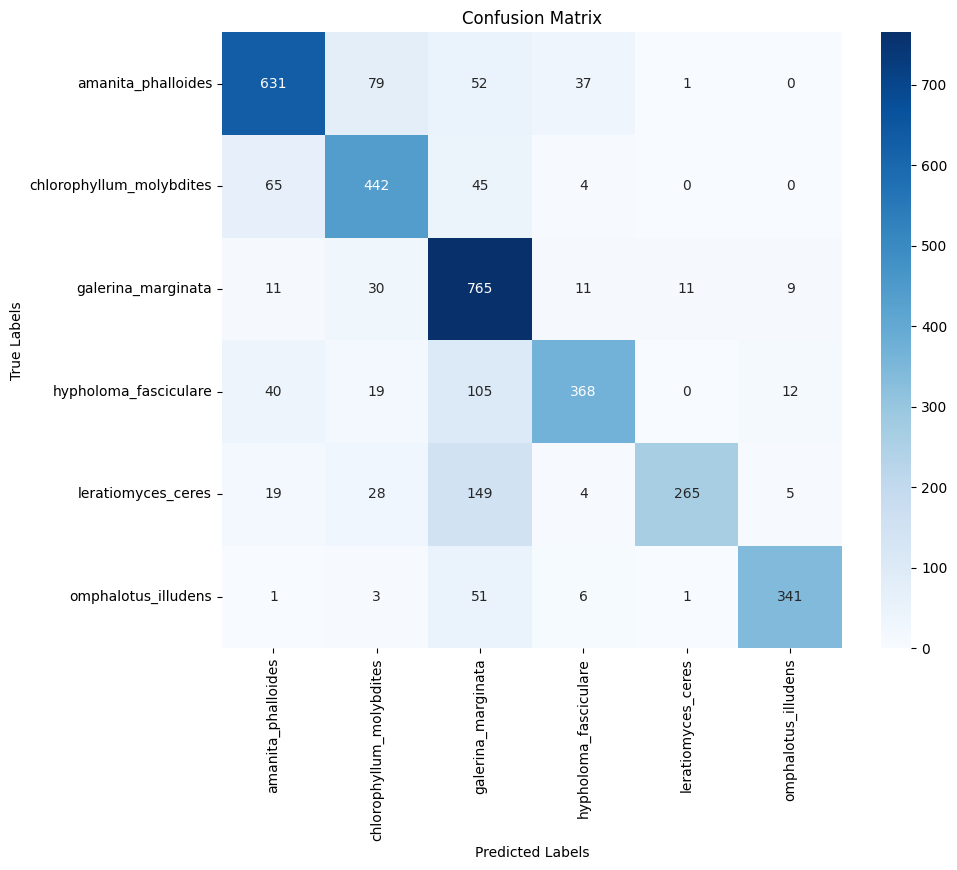

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=test_data.class_indices.keys(), yticklabels=test_data.class_indices.keys())
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()